### CT SCAN Image Contrast Classifier Model building
   

### Problem Statement

Based on a sample set of CT Scan Images ( with Contrast value as label), a model need to be prepared which can predict Contrast value of a new CT Scan Image.
  This problem has been approached in two parts:
  1. First Source data sets has been explored to find more insights  , those are are captured in a Jupyter Notebook file in this repository ( ".....EDA_Analysis.ipnyb")

  2. Secondly A CNN image classifier model has been created based on understandinng from EDA analysis. Find another Jupyter Notebook file for this in this repository ("..this File")



<img src="https://images.unsplash.com/photo-1576091160550-2173dba999ef?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwcm9maWxlLXBhZ2V8MjA5fHx8ZW58MHx8fHw%3D&auto=format&fit=crop&w=500&q=60"/>

                               Source of Image : Unsplash by National Cancer Institute

In [1]:
#!pip3 install opencv-python
#!pip3 install pydicom
import os
path ='....siim_images/dicom_dir'
#os.listdir(path)
import cv2
import numpy as np
import pandas as pd
import pydicom as pydicom
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") ### Warning removal 


In [2]:
def loaddata2dataframe():
    

    ''''Load a Pandas dataframe with the images for model training'''
    
    path ='....siim_images/dicom_dir'
    image_list = os.listdir(path)
    image_count = len(image_list)
    datatable = {
        "FILE": [],
        "ID": [],
        "AGE": [],
        "CONTRAST":[],
        "AGE_RANGE":[],
    }
    for file_num in range(image_count):
        datatable['FILE'].append(image_list[file_num])
        datatable['ID'].append(image_list[file_num][3:7])
        datatable['AGE'].append(int(image_list[file_num][14:16]))
        
        if datatable['AGE'][file_num] < 40:
            datatable['AGE_RANGE'].append('less than 40')
        elif datatable['AGE'][file_num] >= 40 and datatable['AGE'][file_num] < 60:
            datatable['AGE_RANGE'].append('40-59')
        elif datatable['AGE'][file_num] >= 60 and datatable['AGE'][file_num] < 80:
            datatable['AGE_RANGE'].append('59-79')
        else:
            datatable['AGE_RANGE'].append('greater than 80')
        
        datatable['CONTRAST'].append(int(image_list[file_num][26]))
        
    print(f'The data is stored locally in the directory: {path} ,that contains {image_count} images.')
        
    imagetable = pd.DataFrame(data=datatable)
    return imagetable



In [3]:
imagetable =  loaddata2dataframe()


The data is stored locally in the directory: /Users/apple/Downloads/archive/dicom_dir ,that contains 100 images.


In [4]:
imagetable.head()


,FILE,ID,AGE,CONTRAST,AGE_RANGE
0,ID_0062_AGE_0067_CONTRAST_0_CT.dcm,0062,67,0,59-79
1,ID_0072_AGE_0060_CONTRAST_0_CT.dcm,0072,60,0,59-79
2,ID_0041_AGE_0045_CONTRAST_1_CT.dcm,0041,45,1,40-59
3,ID_0075_AGE_0080_CONTRAST_0_CT.dcm,0075,80,0,greater than 80
4,ID_0052_AGE_0072_CONTRAST_0_CT.dcm,0052,72,0,59-79


In [5]:
imagetable.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE       100 non-null    object
 1   ID         100 non-null    object
 2   AGE        100 non-null    int64 
 3   CONTRAST   100 non-null    int64 
 4   AGE_RANGE  100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


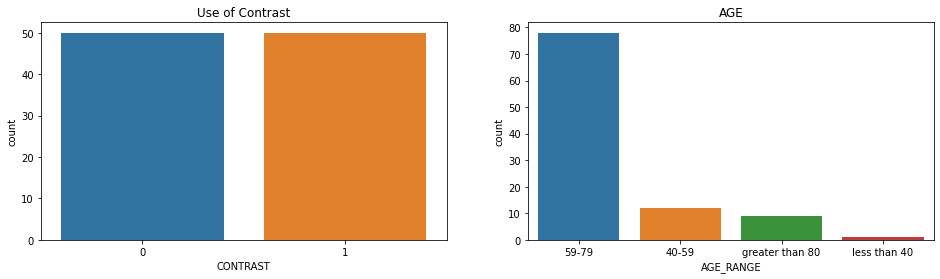

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4))
s1 = sns.countplot(imagetable['CONTRAST'], ax=ax1)
s1.set_title("Use of Contrast")
s2 = sns.countplot(imagetable['AGE_RANGE'], ax=ax2)
s2.set_title("AGE")
plt.show()


In [7]:
imagetable['AGE_RANGE'].value_counts()


59-79              78
40-59              12
greater than 80     9
less than 40        1
Name: AGE_RANGE, dtype: int64

In [8]:
imagetable['AGE'].describe()


count    100.000000
mean      67.480000
std        9.274141
min       39.000000
25%       61.000000
50%       70.000000
75%       74.000000
max       83.000000
Name: AGE, dtype: float64

### Images in DICOM format
The Digital Imaging and Communications in Medicine (DICOM) standard facilitates the interoperability of medical imaging equipment by specifying: network and storage protocols (MITA 2021).

#### Viewing DICOM files and extracting metadata
Pydicom is a pure Python package for working with DICOM files such as medical images, reports and radiation therapy objects. This package manipulates, visualizes and writes DICOM files (Pydicom, 2021).


In [9]:
path ='.....siim_images/dicom_dir' ### Local path for Dicom Image directory

image_list = os.listdir(path)




Patient's Name...: TCGA-17-Z043, 
Patient ID.......: TCGA-17-Z043
Modality.........: CT
Study Date.......: 19840713
Image size.......: 512 x 512
Pixel Spacing....: [006.562500e-01, 006.562500e-01]
Slice location...: -239


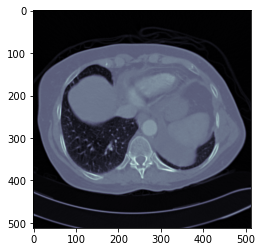

In [10]:
file = pydicom.data.data_manager.get_files(path, image_list[99])[0]
  
metadata = pydicom.dcmread(file)

# Sample Image Metadata (selective):
print()
#print(f"SOP Class........: {metadados.SOPClassUID} ({metadados.SOPClassUID.name})")
print()

pat_name = metadata.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {metadata.PatientID}")
print(f"Modality.........: {metadata.Modality}")
print(f"Study Date.......: {metadata.StudyDate}")
print(f"Image size.......: {metadata.Rows} x {metadata.Columns}")
print(f"Pixel Spacing....: {metadata.PixelSpacing}")

# To ensure about the existence of the sample image use .get() 
print(f"Slice location...: {metadata.get('SliceLocation', '(missing)')}")

plt.imshow(metadata.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
plt.show()


In [11]:
image_count = len(image_list)
range(image_count)


range(0, 100)

In [12]:
file = pydicom.data.data_manager.get_files(path, image_list[1])[0]


In [13]:
metadata = pydicom.dcmread(file)
#metadata


In [14]:
def ImageToDataFrame():
    
   
    path ='....siim_images/dicom_dir'
    image_list = os.listdir(path)
    image_count = len(image_list)
    print(f'There are  {image_count} images.')
    
    image_data = {
        "PatientID": [],
        "PatientSex": [],
        "PatientAge": [],
        "BodyPartExamined": [],        
        "DistanceSource_mm":[],
        "PixelData":[],
        
    }
    
    for img in range(image_count):
              
        file = pydicom.data.data_manager.get_files(path, image_list[img])[0]
        metadata = pydicom.dcmread(file)

        # Metadados da imagem:
        image_data['PatientID'].append(metadata.PatientID)
        image_data['PatientSex'].append(metadata.PatientSex)
        image_data['PatientAge'].append(metadata.PatientAge)
        image_data['BodyPartExamined'].append(metadata.BodyPartExamined)
        image_data['DistanceSource_mm'].append(metadata.DistanceSourceToPatient)
        image_data['PixelData'].append(metadata.pixel_array) #.flatten()

    image_data = pd.DataFrame(data=image_data)
    return image_data



In [15]:
imageframe = ImageToDataFrame()


There are  100 images.


In [16]:
imageframe.head()


,PatientID,PatientSex,PatientAge,BodyPartExamined,DistanceSource_mm,PixelData
0,TCGA-34-8455,M,067Y,LUNG,541.0,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."
1,TCGA-17-Z058,M,060Y,CHEST,570.0,"[[16, 28, 18, 12, 19, 31, 18, 18, 32, 18, 33, ..."
2,TCGA-92-7340,F,045Y,LUNG,570.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,TCGA-34-A5IX,M,080Y,LUNG,541.0,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."
4,TCGA-50-5044,F,072Y,LUNG,630.0,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."


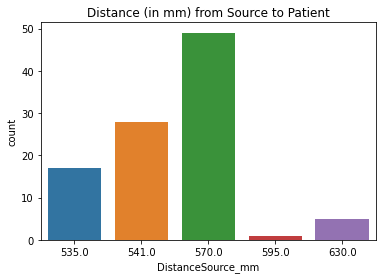

In [17]:
DistanceSource = sns.countplot(imageframe['DistanceSource_mm'])
DistanceSource.set_title("Distance (in mm) from Source to Patient")
plt.show()


In [18]:
def viewImage(n):
    image_sample = imageframe['PixelData'][n]
    plt.imshow(image_sample, cmap=plt.cm.bone)  # set the color map to bone
    plt.show()
    

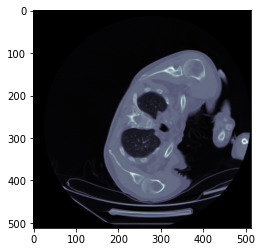

In [19]:
viewImage(4)


In [20]:
im1 = pydicom.read_file('...siim_images/dicom_dir/ID_0012_AGE_0061_CONTRAST_1_CT.dcm')


In [21]:
print(im1.pixel_array)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(im1.pixel_array.shape)


(512, 512)


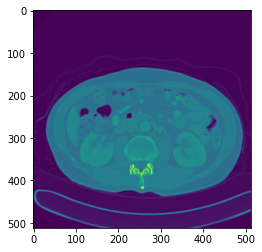

In [23]:
import matplotlib.pyplot as plt
plt.imshow(im1.pixel_array)
plt.show()


In [24]:
im2 = pydicom.read_file('.....siim_images/dicom_dir/ID_0059_AGE_0074_CONTRAST_0_CT.dcm')


In [25]:
print(im2.pixel_array)


[[ 21  26  25 ...  23  25  26]
 [ 21  24  28 ...  25  26  27]
 [ 22  24  29 ...  27  26  28]
 ...
 [119 121 123 ... 123 121 119]
 [122 123 124 ... 120 121 123]
 [122 122 124 ... 120 121 121]]


In [26]:
print(im2.pixel_array.shape)


(512, 512)


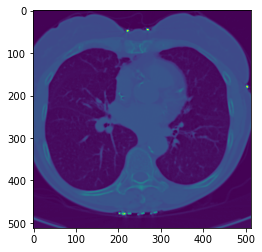

In [27]:
plt.imshow(im2.pixel_array)
plt.show()


In [28]:
slices = []
for file in os.listdir(path):
    slices.append(pydicom.read_file(os.path.join(path,file)))
    

In [29]:
slices


[Dataset.file_meta -------------------------------
 (0002, 0000) File Meta Information Group Length  UL: 196
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6450.4012.266402896965029418188277260373
 (0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
 (0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
 (0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
 -------------------------------------------------
 (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
 (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
 (0008, 0012) Instance Creation Date              DA: '19950131'
 (0008, 0013) Instance Creation Time              TM: '091428'
 (0008, 0016) SOP Class UID                       UI: CT Image Storage
 (0008, 

In [30]:
slices[0].pixel_array


array([[-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       ...,
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024]], dtype=int16)

In [31]:
#pixel spacing
#slice_thickness
#axial_aspect_ratio
#sagital_aspect_ratio
#coronal_aspect_ratio
## find more about the above features in Readme.md file of this repository
pixel_spacing = slices[0].PixelSpacing
slice_thickness = slices[0].SliceThickness

print(pixel_spacing)
print(slice_thickness)


[0.703125, 0.703125]
2.500000


In [32]:
axial_aspect_ratio = pixel_spacing[1]/pixel_spacing[0]
sagital_aspect_ratio = pixel_spacing[1]/slice_thickness
coronal_aspect_ratio = slice_thickness/pixel_spacing[0]
print(axial_aspect_ratio)
print(sagital_aspect_ratio)
print(coronal_aspect_ratio)

1.0
0.28125
3.5555555555555554


In [33]:
image_shape = list(slices[0].pixel_array.shape)
print(image_shape)


[512, 512]


In [34]:
image_shape.append(len(slices))
print(image_shape)


[512, 512, 100]


In [35]:
volume3d = np.zeros(image_shape)
volume3d
volume3d.shape


(512, 512, 100)

In [36]:
a = np.zeros([3,4,4])
a


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [37]:
for i,s in enumerate(slices):
    #print(i,s.pixel_array)
    array2D = s.pixel_array
    volume3d[:,:,i] = array2D
    
print(array2D.shape)
print(volume3d.shape)

(512, 512)
(512, 512, 100)


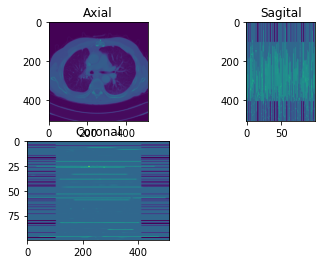

In [38]:
axial = plt.subplot(2,2,1)
plt.title('Axial')
plt.imshow(volume3d[:,:,image_shape[2]//2])
axial.set_aspect(axial_aspect_ratio)

sagital = plt.subplot(2,2,2)
plt.title('Sagital')
plt.imshow(volume3d[:,image_shape[2]//2,:])
sagital.set_aspect(sagital_aspect_ratio)

coronal = plt.subplot(2,2,3)
plt.title('Coronal')
plt.imshow(volume3d[image_shape[2]//2,:,:].T)
coronal.set_aspect(coronal_aspect_ratio)
plt.show()


In [39]:
#features
features = volume3d
features.shape
X = features.transpose(2,0,1)
X.shape


(100, 512, 512)

In [40]:
#labels
labels = []
for file in os.listdir(path):
    labels.append(file.split('_')[-2])
    
Y = np.array(labels)
Y.shape


(100,)

In [41]:
Y

array(['0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0',
       '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0',
       '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1',
       '1', '0', '0', '1', '1', '1', '1', '1', '1'], dtype='<U1')

In [42]:
images = []
for file in os.listdir(path):
    f = pydicom.read_file(os.path.join(path,file)).pixel_array
    fr = cv2.resize(f,(256,256))
    images.append(fr)
    

In [43]:
X = np.array(images)
print(X.shape)


(100, 256, 256)


In [44]:
#labels
labels = []
for file in os.listdir(path):
    labels.append(file.split('_')[-2])
    
Y = np.array(labels)
Y.shape


(100,)

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)


In [46]:
#xtrain.shape()

In [47]:
xtrain = xtrain.reshape(80, 256, 256,1)
xtest = xtest.reshape(20, 256, 256,1)


In [48]:
#xtrain.shape()


In [49]:
xtrain.max()


4095

In [50]:
xtrain_n = xtrain/xtrain.max()
xtest_n = xtest/xtest.max()


In [51]:
#!pip3 install tensorflow
#!pip3 install keras


In [52]:
from tensorflow.keras import utils
ytrain_h = utils.to_categorical(ytrain)
ytest_h = utils.to_categorical(ytest)


### Importing few more Python packages to build Model

In [53]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import regularizers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [54]:
wd = 1e-4
model = Sequential()

model.add(Conv2D(32,(3,3) , padding='same' , kernel_regularizer=regularizers.l2(wd), input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3) , kernel_regularizer=regularizers.l2(wd) , padding='same' ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3) , kernel_regularizer=regularizers.l2(wd) , padding='same' ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3) , kernel_regularizer=regularizers.l2(wd) , padding='same' ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3) , kernel_regularizer=regularizers.l2(wd) , padding='same' ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(1024,(3,3) , kernel_regularizer=regularizers.l2(wd) , padding='same' ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))



In [55]:
#### Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])



In [57]:
print(model.evaluate(xtrain_n,ytrain_h))


3/3 [==============================] - 6s 1s/step - loss: 0.8257 - accuracy: 0.4000
[0.8256648778915405, 0.4000000059604645]


In [58]:
print(model.evaluate(xtest_n,ytest_h))

1/1 [==============================] - 1s 985ms/step - loss: 0.8252 - accuracy: 0.7500
[0.8251646161079407, 0.75]


### Conclusion

This model is working with descent accuracy for test data set. though there is always a scope of improvement. Even another try could also be made using tiff images and also with more sample data. 

#### References:
1. MITA - Medical Imaging Technology Association. DICOM PS3.1 2021b - Introduction and Overview. NEMA, DICOM Standards Committee (2021).Available HERE: http://dicom.nema.org/medical/dicom/current/output/html/part01.html#sect_1.1 Accessed on 07/25/2021.

2. Albertina, B., Watson, M., Holback, et al. Radiology Data from The Cancer Genome Atlas Lung Adenocarcinoma [TCGA-LUAD] collection. The Cancer Imaging Archive. (2016). 
https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD .Accessed on 07/25/2021.

3. Innolitics. DICOM Standard Browser. (2021) https://dicom.innolitics.com/ciods . Accessed on 07/25/2021.

4. Pydicom. Introduction to pydicom - Brief overview of pydicom. (2021). https://pydicom.github.io/pydicom/stable/old/getting_started.html . Accessed on 07/25/2021.

5. Clark K, Vendt B, Smith K, Freymann J, Kirby J, Koppel P, Moore S, Phillips S, Maffitt D, Pringle M, Tarbox L, Prior F. The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository, Journal of Digital Imaging, Volume 26, Number 6, December, 2013, pp 1045-1057.